# 04 Correlation and Linear Regression
__Math 3080: Fundamentals of Data Science__

Reading:
* Grus, Chapter 5 - Statistics
* Phillips, Chapter 5 - Linear Regression
* Geron, Chapter 4 - Training Models, pp. 111-117

Outline:
1. Correlation
2. Linear Regression
3. Multiple Linear Regression
4. Error Analysis

-----
## 4.1 Correlation
* Correlation
  * How to calculate correlation
  $$r=\frac{1}{n-1}\sum\left(\frac{x-\bar{x}}{s_x}\frac{y-\bar{y}}{s_y}\right) \qquad r=\frac{Cov[X,Y]}{s_xs_y}$$
  * Linear algebra methods
  $$\bar{X} = \vec{x}-\bar{x} \qquad \bar{Y} = \vec{y}-\bar{y} \qquad r = \frac{1}{n-1}\frac{\bar{X}\cdot\bar{Y}}{s_xs_y}$$
  * Calculating and plotting on Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 30                               # Number of datapoints
m = np.random.randint(1,100)/10.0    # Slope off of which data is based.

x = np.random.randint(0,20,n)
y = m*x + np.random.randint(2,100,n)/10.0

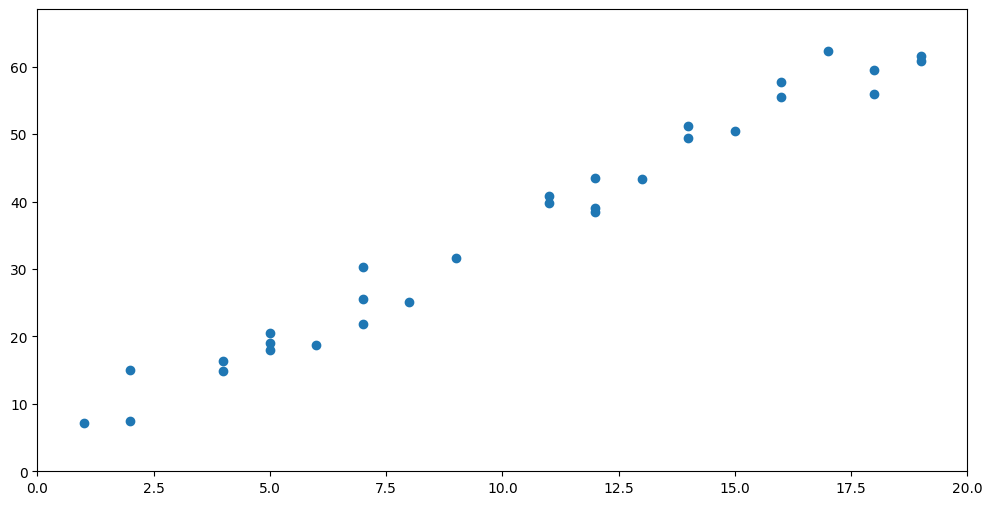

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.scatter(x,y)
plt.xlim([0,20])
plt.ylim([0,(max(y)*1.10)])
plt.show()

In [5]:
def correlation(x,y):
    x_deviation = x - np.mean(x)
    y_deviation = y - np.mean(y)
    x_std = np.std(x, ddof=1)      # the ddof indicated degrees of freedom, basically means
    y_std = np.std(y, ddof=1)      # we are dividing by n-1. If ddof=0, then we divide by n.
    return np.dot(x_deviation,y_deviation)/x_std/y_std/(len(x)-1)

correlation(x,y)

0.9879751860906284

In [6]:
np.corrcoef(x,y)

array([[1.        , 0.98797519],
       [0.98797519, 1.        ]])

We can also find the correlation between vectors within the same dataset (vectors are depicted as rows in this matrix):

In [7]:
A = np.random.random((5,3))
A

array([[0.33152723, 0.56813924, 0.60898016],
       [0.7668789 , 0.90192439, 0.38758789],
       [0.53939946, 0.36356248, 0.75944725],
       [0.99295798, 0.30903513, 0.57081937],
       [0.93497738, 0.39457923, 0.92865042]])

In [8]:
np.corrcoef(A)

array([[ 1.        , -0.39341305,  0.19978102, -0.86492422, -0.38669961],
       [-0.39341305,  1.        , -0.97942448, -0.12115751, -0.69570807],
       [ 0.19978102, -0.97942448,  1.        ,  0.31898897,  0.82635934],
       [-0.86492422, -0.12115751,  0.31898897,  1.        ,  0.7973232 ],
       [-0.38669961, -0.69570807,  0.82635934,  0.7973232 ,  1.        ]])

A quick note on causation. If a high correlation is found, the it is tempting to say that the variable A is the reason (or cause) for variable B. This is rarely the case and should never be assumed. For example:
* El Nino
  * Many are told that El Nino weather events cause weird weather around the world
  * El Nino is localized to a relatively small area along the equator in the East Pacific Ocean
  * In truth, the global weather patterns that allow an El Nino to form also allow the different weather patterns around the world
  * There is a correlation between El Nino and weird weather around the world, but it is *not* a causal relationship

Here are a couple of images to help demonstrate this. Ask yourself, "Is there a correlation? Is that relationship causal?":

<img src="https://pbs.twimg.com/media/E3RrIPUXwAUcFGy.jpg:large" width=230>
<img src="https://pbs.twimg.com/media/E3hc8WsWUAAsn5Z.jpg" width=270>

## 4.2 Linear Regression
If the data form along a line, we could find a line that "best fits" the data. By this we mean that the errors (differences between the predicted and true values) are minimized. We will discuss errors next.

Note that regression lines aren't always linear. They can often be exponential, logarithmic, quadratic, cubic, or the regression line may follow another n-degree polynomial.

To create a line that best fits the data, we need it to follow the form,
$$y=ax+b$$
where $a$ is the slope and $b$ is the y-intercept. The slope $a$ can be found by looking at how the $x$- and $y$- values compare to the average, and then to each other. We can utilize the dot-product for this, since two values that act similarly will create a large positive product, two values that act in opposite directions will create a large negative product, and two values that aren't dependent of each other give a result close to 0. Once we have the dot product, then we just normalize the result.
$$a=\frac{\bar{X}\cdot \bar{Y}}{||\bar{X}||^2} \qquad \bar{X} = \left\{x_i - \bar{x}\right\}, \bar{Y} = \left\{y_i - \bar{y}\right\}$$

In [10]:
m     # The original slope

3.3

In [11]:
X_bar = x - np.mean(x)
Y_bar = y - np.mean(y)

a = X_bar.dot(Y_bar) / X_bar.dot(X_bar)
a          # Slope of line-of-best-fit

3.2739799657952604

Then, the y-intercept is found by applying the means to our linear equation:
$$\bar{y} = a\bar{x} + b \qquad\to\qquad b = \bar{y} - a\bar{x}$$

In [12]:
b = np.mean(y) - a*np.mean(x)

if np.sign(b) == 1.0:
    print("Linear Regression Model:  y = {0:.2f}x + {1:.2f}".format(a,b))
elif np.sign(b) == -1.0:
    print("Linear Regression Model:  y = {0:.2f}x - {1:.2f}".format(a,abs(b)))

Linear Regression Model:  y = 3.27x + 5.82


Now, we can use this model to predict new values!

In [41]:
x_new = np.random.randint(0,20)
y_new = a*x_new + b
print("If x = {0:.2f}, then according to our model, y_hat = {1:.2f}".format(x_new,y_new))

If x = 15.00, then according to our model, y_hat = 54.93


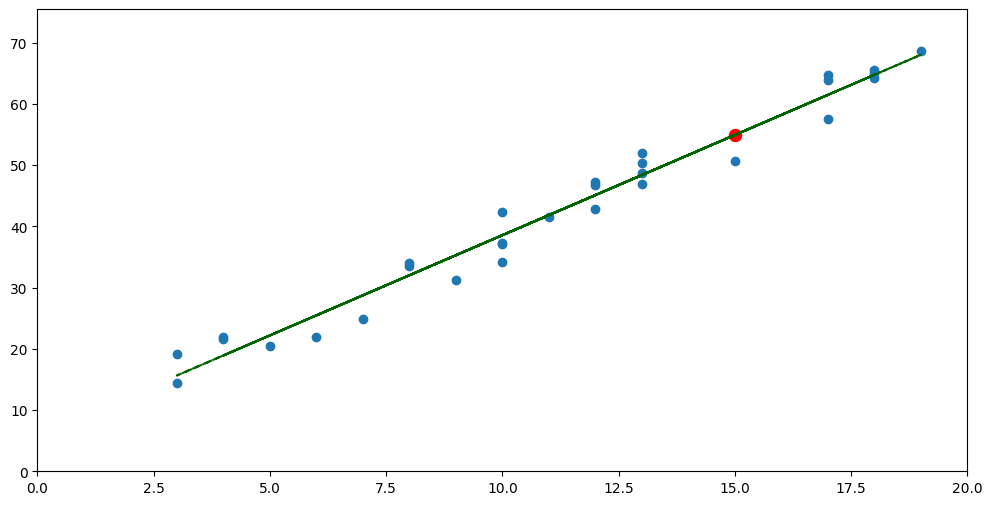

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.scatter(x,y)                              # Original Data
ax = plt.plot(x,a*x + b,
              linestyle="--", color='darkgreen')   # Line of Best Fit
ax = plt.scatter(x_new,y_new,color='r', s=75)      # Prediction Point

plt.xlim([0,20])
plt.ylim([0,(max(y)*1.10)])

plt.show()

## 4.3 Multi-Dimensional Linear Regression
This method works for one value of $x$. But what if we are working with a vector of data $\vec{x}$ (for example, height, weight, blood pressure, etc.)? Then we can expand our linear regression model to be:
$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \dots + \theta_nx_n$$
where $\hat{y}$ is the predicted value from the model and $n$ is the number of features. The coefficients $\theta_i$ are known as the __parameters__ for the linear regression equation. $\theta_0$ is known as the __bias term__, and the parameters $\left\{\theta_1,\theta_2,\dots,\theta_n\right\}$ are the __weights__ given to each $x_i$. Using linear algebra, we can simplify this equation down to:
$$\hat{y} = \vec{\theta}\cdot\vec{x}$$
Note: In order to match the dimensions of $\vec{\theta} = \{\theta_0,\theta_1,...\}$, we include an extra term in $\vec{x} = \{x_0,x_1,...\}$, where $x_0=1$.

We already looked at creating a multi-dimensional linear regression model when we reviewed linear algebra:
$$A\vec{x} = b \qquad\to\qquad \vec{x} = A^{-1}b$$
However, there is a problem:
* $A^{-1}$ must be a square matrix to be invertible
* If you have 3 variables, then you limited to 3 datapoints, which is not enough to create a reliable model

There are complex ways to calculate this, but when dealing with large amounts of data, it would take months to do by hand. Fortunately, we have an algorithm to simplify this process on the computer. To do this, we use the __normal equation__:
$$\hat{\theta} = (\vec{x}^T\vec{x})^{-1}\vec{x}^T\vec{y}$$
$\hat{\theta}$ is the set of parameters that minimizes the errors, so becomes our model.

__Example__: (Need to create a good example)

## 4.4 Error Analysis
In order to evaluate how good a model is, we need to measure the errors it produces. No model is perfect, so measuring the amount of error is important to determine how robust the model is.

There are three basic error analysis methods we will consider here: 
1. Mean Absolute Error (MAE)
2. Sum of the Squared Errors (SSE)
3. Mean Squared Error (MSE) / Root Mean Squared Error (RMSE)

But before we do, we have to consider a common problem with errors: testing model on the same data used to train the model. If we use dataset $X$ to train model $M$, then running the data through the model again will give us really good results, since the model was built on that data. We need to create the model on one set of data, then check how good the model is using a second set. So, it is common practice to do the following:
* Separate dataset into two groups (70% in training set, 30% in testing set - numbers can easily vary: 75/25, 60/40, ... it depends on how much data you start with)
* Use the training set to create the model (testing set isn't even looked at)
* Once the model is created, use the testing set to see if the model gives the correct results.

For our linear regression model, we have created a model using one training set. Let's consider another set of data to test the model:

In [ ]:
# Test Set
n_test = 5
x_test = np.random.randint(0,20,n_test)
y_hat = m*x_test + np.random.randint(2,100,n_test)/10.0     # True Values

# Run your model
y_test = a*x_test + b        # Tested Values

### Mean Absolute Error (MAE)
The mean absolute error is found by doing the following:
* Run the testing set through the model to get results ($y$)
* Take the difference from the true value ($\hat{y}$) to see the deviation
* Take the average difference from all datapoints
$$MAE = \frac{1}{n}\sum_i \left|y_i-\hat{y}_i\right|$$

In [ ]:
def ma_error(real_results, test_results):
    return sum(abs(test_results - real_results)) / len(test_results)

ma_error(y_hat, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_hat, y_test)

### Sum of the Squares Error (SSE)
The problem with the MAE is that all points have the same weight: a point that is really close to the true value has the same impact on the mean as another point that is extremely off. Sometimes, we like to "reward" close values and "penalize" values with large errors. We can do this by squaring the difference.
* If a point $y_i$ is close to the true value $\hat{y}_i$, then the difference is small. If the difference is less than one, then squaring the error will decrease its value.
* If a point $y_i$ is far from the true value $\hat{y}_i$, then the difference is large, and squaring the error will decrease its value.
* The further a point $y_i$ is from the true value, the more it will be penalized

So, a more popular choice is the MSE. To understand the MSE, we start with the SSE:
$$SSE = \sum_i (y_i - \hat{y}_i)^2$$

### Mean Squared Error (MSE) / Root Mean Squared Error (RMSE)
The SSE takes the squared error (which penalizes large errors), then finds the total squared error. The MSE is the same, but instead of finding the total squared error, we find the mean.
$$MSE = \frac{SSE}{n} = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$$

The only issue with the MSE is that the difference is in squared units. If we want to get rid of the squared units, we just take the square root.
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_i (y_i - \hat{y}_i)^2}$$

In [ ]:
def ms_error(real_results, test_results):
    return sum((test_results - real_results)**2) / len(test_results)

ms_error(y_hat, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

mse(y_hat, y_test)